In [15]:
# create our machine learning models

import pandas as pd
import numpy as np
import sklearn as sk

print('pandas ', pd.__version__)
print('numpy ', np.__version__)
print('sklearn', sk.__version__)

pandas  1.1.3
numpy  1.19.2
sklearn 0.23.2


In [16]:
data = pd.read_csv('data/data.csv')
data.shape

(2462, 23)

In [17]:
y = data['Attrition']
print(y)
print(type(y))

0       1
1       0
2       1
3       0
4       0
       ..
2457    1
2458    1
2459    1
2460    1
2461    1
Name: Attrition, Length: 2462, dtype: int64
<class 'pandas.core.series.Series'>


In [18]:
X = data.drop(columns =['Attrition'])
print(X)
print(type(y))

             0         1         2         3         4         5         6  \
0     0.446350  0.742527 -1.010909 -1.701283 -0.660531  0.379672 -0.057788   
1     1.322365 -1.297775 -0.147150 -1.699621  0.254625 -1.026167 -0.057788   
2     0.008343  1.414363 -0.887515 -1.696298  1.169781 -1.026167 -0.961486   
3    -0.429664  1.461466 -0.764121 -1.694636  1.169781  0.379672 -0.961486   
4    -1.086676 -0.524295 -0.887515 -1.691313 -1.575686  0.379672 -0.961486   
...        ...       ...       ...       ...       ...       ...       ...   
2457 -0.968293 -0.454570 -1.010909 -0.366426 -1.575686 -2.317985 -0.961486   
2458 -0.362479  0.542016 -0.612703  0.802424 -1.575686 -2.432006 -0.057788   
2459 -1.574962 -1.682238 -0.609374 -0.083717 -1.343160  0.379672 -0.961486   
2460  0.031068 -0.745596  1.468148  0.544617  1.169781 -0.241015  0.341201   
2461 -0.621137 -1.119606  1.549345  0.604116  1.169781  0.379672 -0.057788   

             7         8         9  ...        12        13    

In [19]:
# convert X and y to numpy arrays

y = np.asarray(y)
X = np.asarray(X)
print(y)
print(type(y))
print(y.shape)

print(X)
print(type(X))
print(X.shape)

[1 0 1 ... 1 1 1]
<class 'numpy.ndarray'>
(2462,)
[[ 0.4463504   0.74252653 -1.01090934 ... -0.0632959  -0.67914568
   0.24583399]
 [ 1.32236521 -1.2977746  -0.14714972 ...  0.76499762 -0.36871529
   0.80654148]
 [ 0.008343    1.41436324 -0.88751511 ... -1.16768726 -0.67914568
  -1.15593471]
 ...
 [-1.5749622  -1.68223792 -0.60937419 ... -1.02738338 -0.6002704
  -1.01346812]
 [ 0.03106816 -0.74559632  1.46814803 ... -0.37169363 -0.02196853
  -0.84278319]
 [-0.62113676 -1.1196061   1.54934531 ... -0.61549158  1.12489956
   0.71843205]]
<class 'numpy.ndarray'>
(2462, 22)


In [20]:
from sklearn.model_selection import train_test_split

random_seed = 30

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=random_seed)

numerator = y_train[y_train == 1].sum()
denominator = len(y_train)
print("\n", numerator/denominator * 100, " percent of training data is in class 1")


 50.04780114722753  percent of training data is in class 1


# KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Train logistic regression model (with default regularization) for binary classification
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions on test data and print the test accuracy
y_pred = model.predict(X_test)
knn_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print('\nTest accuracy: '+str(knn_test_accuracy))


Test accuracy: 0.8513513513513513


# Decision Tree

In [30]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', 
                              max_depth=11, 
                              random_state=2)
tree.fit(X_train, y_train)


y_pred = tree.predict(X_test)
tree_test_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Test accuracy: "+str(tree_test_accuracy))

Test accuracy: 0.8810810810810811


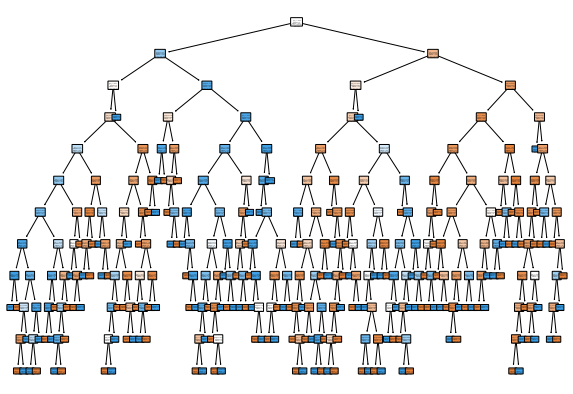

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

plot_tree(tree, 
          filled=True, 
          rounded=True,
          class_names=['Yes', 
                       'No']) 

plt.show()